# Modulo 22 - Tarefa 01

## 1. Monte um passo a passo para o BAGGING

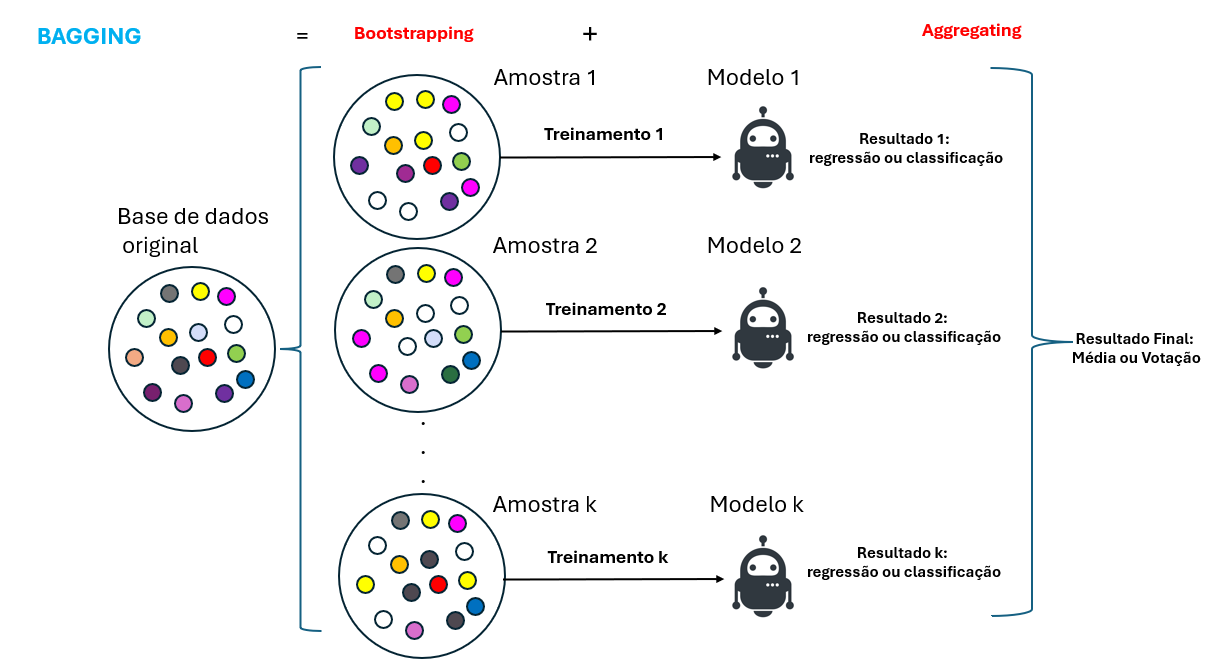

## 2. Explique com suas palavras o BAGGING

O Bagging é uma das duas estratégias que compõe o metódo esnemble, que é um método que combina vários modelos para melhorar as previsões e, posteriormente, a tomada de decisções. Pos sua vez a técnica Bagging é composta por duas etapas, na primeira etapa que é chamada de Booststrapping, que consiste em criar subconjuntos dos dados originais por meio de amostragem com reposição, o que significa que um mesmo dado pode aparecer em múltiplos subconjuntos, como pode ser analisado na imagem acima. Na segunda etapa, várias instâncias do mesmo algoritmo são treinadas paralelamente, tomando por base os subconjuntos criados,  aleatórios e independentes dos dados de treinamento. O resultado final será definido ou por média, nos casos de regressção ou por votação, no casos de classificação

## 3. (Opcional) Implementar em python o código do BAGGING
* Bootstrap
* Modelagem
* Agregação

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Função para criar amostras com reposição (Bootstrap)
def bootstrap(df, num_amostras):
    amostras = []
    tamanho_amostra = len(df)
    for i in range(num_amostras):
        amostra_com_reposicao = df.sample(n=tamanho_amostra, replace=True)
        amostras.append(amostra_com_reposicao)
    return amostras

# Função para modelagem (treinamento dos modelos)
def modelagem(amostras, variavel_dependente, variaveis_independentes, teste_size=0.2, random_state=None):
    predicoes = []

    for amostra in amostras:
        X = amostra[variaveis_independentes]
        y = amostra[variavel_dependente]
        
        X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=teste_size, random_state=random_state)
        
        modelo = LinearRegression()
        modelo.fit(X_treino, y_treino)
        y_pred = modelo.predict(X_teste)
        predicoes.append(y_pred)
    
    return predicoes

# Função para agregação (obtenção da predição final)
def agregacao(predicoes):
    predicoes_media = np.mean(predicoes, axis=0)
    return predicoes_media



# Apicando o modelo

In [3]:
# Criando um DataFrame de exemplo (simulação de dados de funcionários)
dados = {'Salario': [3000, 5000, 7000, 4000, 6000, 8000, 4500, 6500, 8500, 5500],
         'Idade': [25, 30, 35, 28, 32, 36, 27, 31, 37, 29],
         'Experiencia': [3, 5, 7, 4, 6, 8, 3, 5, 7, 4]}
df = pd.DataFrame(dados)

# Definindo as variáveis dependentes e independentes
variavel_dependente = 'Salario'
variaveis_independentes = ['Idade', 'Experiencia']

# Parâmetros do Bagging
num_amostras_bagging = 100  # Número de amostras para o Bagging
teste_size = 0.2

# Etapa 1: Bootstrap
amostras = bootstrap(df, num_amostras_bagging)

# Etapa 2: Modelagem
predicoes_modelagem = modelagem(amostras, variavel_dependente, variaveis_independentes, teste_size)

# Etapa 3: Agregação
predicoes_agregacao = agregacao(predicoes_modelagem)
predicoes_agregacao = [round(valor, 2) for valor in predicoes_agregacao]

# Exibindo as predições médias finais
print("Predições médias do Bagging:")
print(predicoes_agregacao)

Predições médias do Bagging:
[6092.08, 5625.56]
